In [2]:
import re
import warnings
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

In [3]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stopwords = stopwords.words('english')

In [4]:
df = pd.read_csv(r'../data/UpdatedResumeDataSet.csv')
df.head(2)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...


In [4]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [5]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

Text(0, 0.5, 'Frequency of Records')

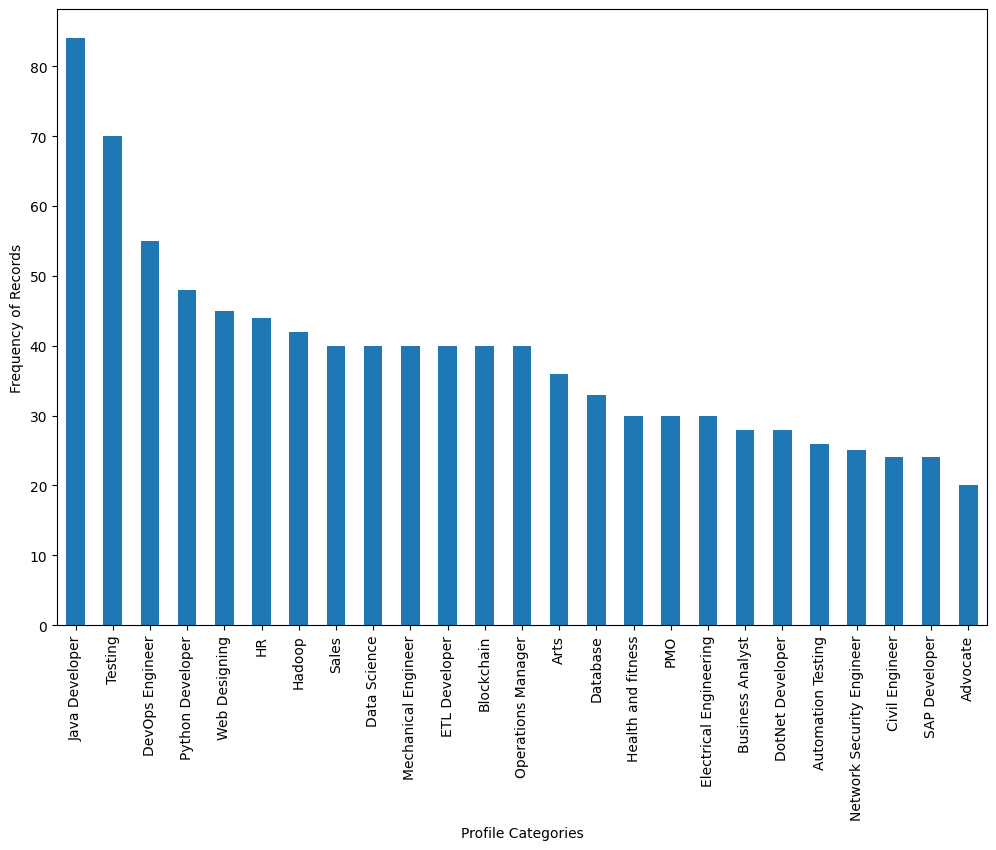

In [6]:
plt.figure(figsize=(12,8))
df['Category'].value_counts().plot(kind='bar')
plt.xlabel('Profile Categories')
plt.ylabel('Frequency of Records')

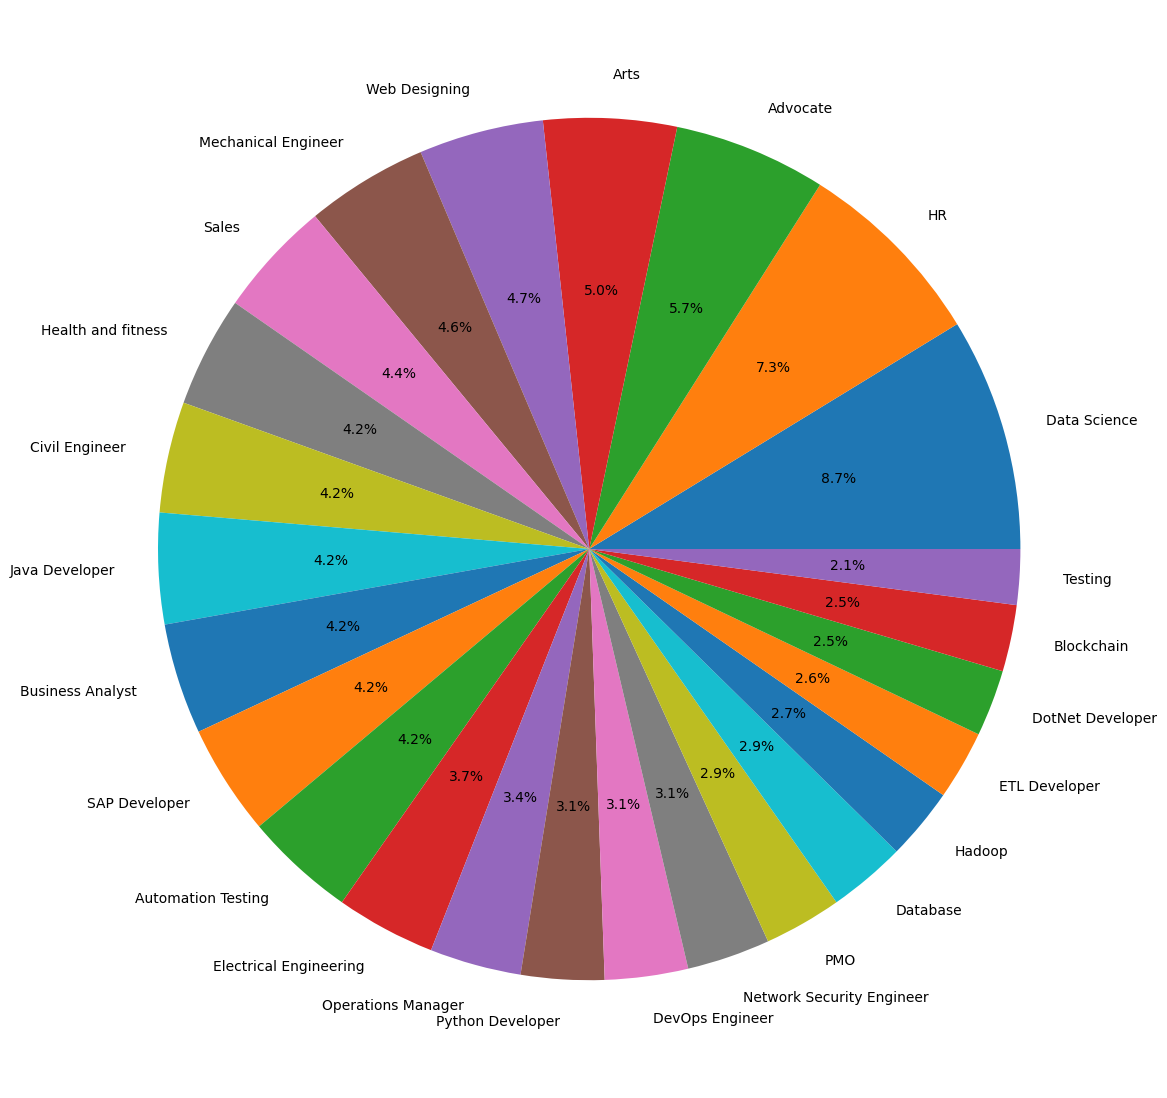

In [7]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()

plt.figure(figsize=(20,14))
plt.pie(counts,labels=labels,autopct='%1.1f%%')
plt.show()

In [8]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [7]:
# Resume text Cleaning
def clean_text(text):
    email_pattern = re.compile(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}')
    links_pattern = re.compile(r'https?:\/\/\S+|www\.\S+')
    cleaned_text = text.replace(r'\n', ' ').replace('\n', ' ')

    cleaned_text = email_pattern.sub('',cleaned_text)
    cleaned_text = links_pattern.sub('',cleaned_text)

    cleaned_text = re.sub('[^\w\s]','',cleaned_text)
    cleaned_text = re.sub(r'[â]', '', cleaned_text) 
    cleaned_text = re.sub(r'[ã]', '', cleaned_text) 
    cleaned_text = re.sub(r'\b[1-9][0-9]?\b', '', cleaned_text)
    
    cleaned_text = cleaned_text.lower()

    cleaned_text = " ".join([word for word in cleaned_text.split() if word not in stopwords])
    cleaned_text = " ".join([lemmatizer.lemmatize(word) for word in cleaned_text.split()])

    return cleaned_text

df['Resume'] = df['Resume'].apply(clean_text)
df['Resume'].head()

0    skill programming language python panda numpy ...
1    education detail may 2013 may 2017 uitrgpv dat...
2    area interest deep learning control system des...
3    skill r python sap hana tableau sap hana sql s...
4    education detail mca ymcaust faridabad haryana...
Name: Resume, dtype: object

In [8]:
le = LabelEncoder()
df['Category_Label'] = le.fit_transform(df[['Category']])
df.head()

,Category,Resume,Category_Label
0,Data Science,skill programming language python panda numpy ...,6
1,Data Science,education detail may 2013 may 2017 uitrgpv dat...,6
2,Data Science,area interest deep learning control system des...,6
3,Data Science,skill r python sap hana tableau sap hana sql s...,6
4,Data Science,education detail mca ymcaust faridabad haryana...,6


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Resume'])
y = df['Category_Label']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=32)

X_train

<644x7119 sparse matrix of type '<class 'numpy.float64'>'
	with 104324 stored elements in Compressed Sparse Row format>

In [14]:
len(df['Category_Label'].unique())

25

### Model Training

In [15]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, precision_score, recall_score

models = {
    "SVC": SVC(),
    "NaiveBayes": MultinomialNB(),
    "XGBoost": XGBClassifier(),
    "Decision_Tree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random_Forest": RandomForestClassifier(),
    "Logistic_Regression": LogisticRegression()
}

In [16]:
n = len(models)

for key,value in models.items():
    model = value 
    model.fit(X_train,y_train)

    # make predictions 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Trained Data performance
    model_train_acc = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average="weighted")  # Specify 'weighted', 'macro', or 'micro'
    model_train_precision = precision_score(y_train, y_train_pred, average="weighted")
    model_train_recall = recall_score(y_train, y_train_pred, average="weighted")


    # Test Data performance 
    model_test_acc = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test,y_test_pred, average='weighted')

    print(f"Model: {key}")

    print("Model Performance for Training set")
    print("- Accuracy: {:.4f}".format(model_train_acc))
    print("- F1-Score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))

    print()

    print("Model Performance for Test set")
    print("- Accuracy: {:.4f}".format(model_test_acc))
    print("- F1-Score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))

    print("-----------------------------------------------------------------------------------------------------------------")


Model: SVC
Model Performance for Training set
- Accuracy: 1.0000
- F1-Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000

Model Performance for Test set
- Accuracy: 0.9937
- F1-Score: 0.9937
- Precision: 0.9943
- Recall: 0.9937
-----------------------------------------------------------------------------------------------------------------
Model: NaiveBayes
Model Performance for Training set
- Accuracy: 0.9425
- F1-Score: 0.9403
- Precision: 0.9622
- Recall: 0.9425

Model Performance for Test set
- Accuracy: 0.8742
- F1-Score: 0.8642
- Precision: 0.9062
- Recall: 0.8742
-----------------------------------------------------------------------------------------------------------------
Model: XGBoost
Model Performance for Training set
- Accuracy: 1.0000
- F1-Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000

Model Performance for Test set
- Accuracy: 0.9937
- F1-Score: 0.9937
- Precision: 0.9943
- Recall: 0.9937
-----------------------------------------------------------------------------

So we will hyperparameter tune these models 
- SVC
- XGBoost
- Random Forest
- Gradient Boosting

In [17]:
# SVC params

svc_params = {
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01], 
    'degree': [3,4,5]       
}

xgb_params = {
    # 'eta': [0.05,0.1,0.2],
    'max_depth': [7,9,11,13],
    'min_child_weight': [3,5,7,9],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

rf_params = {
    'n_estimators': [50,100,200,500],
    'max_depth': [8,10,12],
    'max_features': ['sqrt','log2']
}

grdb_params = {
    'min_samples_leaf': [3,5,7,9],
    'max_depth': [7,9,11,13],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
}

# models list for hyper-parameter tuning
cv_models = [
    ("SVC",SVC(),svc_params),
    # ("XGBoost",XGBClassifier(use_label_encoder=False),xgb_params),
    ("RandomForest",RandomForestClassifier(),rf_params),
    ("GradientBoost",GradientBoostingClassifier(),grdb_params),
] 

In [ ]:
from sklearn.model_selection import GridSearchCV

tuned_model = {}
model_params = {}

for name, model, params in cv_models:
    gridSearchCV = GridSearchCV(estimator=model,param_grid=params,cv=3,verbose=2,refit=True)
    tuned_model[name] = gridSearchCV

    gridSearchCV.fit(X_train,y_train)
    model_params[name] = gridSearchCV.best_params_ 


In [19]:
for name, param in model_params.items():
    print("-----------------------------------------------------------------------------------\n")
    print(f"For {name}")
    print(param)
    print()

-----------------------------------------------------------------------------------

For SVC
{'C': 10, 'degree': 3, 'gamma': 1, 'kernel': 'sigmoid'}

-----------------------------------------------------------------------------------

For RandomForest
{'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 500}

-----------------------------------------------------------------------------------

For GradientBoost
{'learning_rate': 0.1, 'max_depth': 9, 'min_samples_leaf': 5, 'n_estimators': 50}



In [22]:
print("Best Tunned Models: \n")

for name,model in tuned_model.items():

    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    # Trained Data performance 
    model_train_acc = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average="weighted")  # Specify 'weighted', 'macro', or 'micro'
    model_train_precision = precision_score(y_train, y_train_pred, average="weighted")
    model_train_recall = recall_score(y_train, y_train_pred, average="weighted")
    
    # Test Data performance 
    model_test_acc = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test,y_test_pred, average='weighted')

    print(f"Model: {name}")

    print("Model Performance for Training set")
    print("- Accuracy: {:.4f}".format(model_train_acc))
    print("- F1-Score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))

    print()

    print("Model Performance for Test set")
    print("- Accuracy: {:.4f}".format(model_test_acc))
    print("- F1-Score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))

    print("-----------------------------------------------------------------------------------------------------------------")    



Best Tunned Models: 

Model: SVC
Model Performance for Training set
- Accuracy: 1.0000
- F1-Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000

Model Performance for Test set
- Accuracy: 0.9937
- F1-Score: 0.9937
- Precision: 0.9945
- Recall: 0.9937
-----------------------------------------------------------------------------------------------------------------
Model: RandomForest
Model Performance for Training set
- Accuracy: 0.9969
- F1-Score: 0.9967
- Precision: 0.9970
- Recall: 0.9969

Model Performance for Test set
- Accuracy: 0.9686
- F1-Score: 0.9615
- Precision: 0.9741
- Recall: 0.9686
-----------------------------------------------------------------------------------------------------------------
Model: GradientBoost
Model Performance for Training set
- Accuracy: 1.0000
- F1-Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000

Model Performance for Test set
- Accuracy: 0.9969
- F1-Score: 0.9969
- Precision: 0.9972
- Recall: 0.9969
-----------------------------------------------

In [13]:
# so we will choose gradient boost model
import os
import pickle

save_path = "../models"
os.makedirs(save_path, exist_ok=True)

gb_model_path = os.path.join(save_path, "tfidf_GBoost_model.pkl")
with open(gb_model_path, 'wb') as file:
    pickle.dump(tuned_model['GradientBoost'], file)

label_encoder_path = os.path.join(save_path, "label_encoder.pkl")
with open(label_encoder_path, 'wb') as file:
    pickle.dump(le, file)

tfidf_vectorizer_path = os.path.join(save_path, "tfidf_vectorizer.pkl")
with open(tfidf_vectorizer_path, 'wb') as file:
    pickle.dump(tfidf, file)